<p style="font-family: arial, Times New Roman; font-size:25pt; color:black;text-align:justify">
    Exploratory Data Analysis
 </p>

# 2 Temperature

<p style="font-family: arial, Times New Roman; font-size:12pt; color:black;text-align:justify">
    Temperature database stations 11 (Tmax), 14 (Tmax, Tmin)
 </p>

<span style="font-family: arial, Times New Roman; font-size:16pt; color:dodgerblue; text-align:justify">
Content
</span>

* [2 Temperature](#2-Temperature)
	* [2.1 Load data](#2.1-Load-data)
	* [2.2 Plot daily series](#2.2-Plot-daily-series)  
	* [2.3 Montlhy maxima](#2.3-Montlhy-maxima)  
	* [2.4 GEV distribution fit to monthly maxima](#2.4-GEV-distribution-fit-to-monthly-maxima)
	* [2.5 Annual maxima](#2.5-Annual-maxima)
	* [2.6 GEV distribution fit to annual maxima](#2.6-GEV-distribution-fit-to-annual-maxima)

<hr size="2"/><br>

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import os.path as op
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime

## 2.1 Load data

In [3]:
p_db = op.join(os.getcwd(),'..','..','data','Temperature')

# database temperature stations 11 - 14 (txt file)
p_dat11 = op.join(p_db, 'Tmax_Est_11.txt')
p_dat14 = op.join(p_db, 'Tmax_Tmin_Est_14.txt')

# database exploration
data11 = pd.read_csv(
    p_dat11,   
    header=0, sep='\t',
    na_values = -9999,
    names = ['year', 'month', 'day', 'Tmax']
)

data14 = pd.read_csv(
    p_dat14,   
    header=0, sep='\t',
    na_values = -9999,
    names = ['year', 'month', 'day', 'Tmax', 'Tmin']
)


In [6]:
# format to Celsius degrees (ªC)
data11.Tmax = data11.Tmax/10

data14.Tmax = data14.Tmax/10
data14.Tmin = data14.Tmin/10

In [7]:
# create date column with datetime
data11.index = pd.to_datetime(data11[['year', 'month', 'day']], errors='coerce')
data14.index = pd.to_datetime(data14[['year', 'month', 'day']], errors='coerce')

In [11]:
data11

year  month  day  Tmax
1882-01-01  1882      1    1   NaN
1882-01-02  1882      1    2   NaN
1882-01-03  1882      1    3   NaN
1882-01-04  1882      1    4   NaN
1882-01-05  1882      1    5   NaN
...          ...    ...  ...   ...
2006-12-27  2006     12   27   NaN
2006-12-28  2006     12   28   NaN
2006-12-29  2006     12   29   NaN
2006-12-30  2006     12   30   NaN
2006-12-31  2006     12   31   NaN

[46500 rows x 4 columns]

In [9]:
# create datetime index
print(data11.info(verbose=True), '\n')
print(data14.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46500 entries, 1882-01-01 to 2006-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    46500 non-null  int64  
 1   month   46500 non-null  int64  
 2   day     46500 non-null  int64  
 3   Tmax    42557 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB
None 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53568 entries, 1863-01-01 to 2006-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    53568 non-null  int64  
 1   month   53568 non-null  int64  
 2   day     53568 non-null  int64  
 3   Tmax    50441 non-null  float64
 4   Tmin    50519 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.5 MB
None


In [12]:
def func(dataframe):
    return(len(np.unique(dataframe.month.values)))
true_month = data11.dropna().drop(columns=['day','Tmax']).groupby(by=['year']).apply(func) >= 8
dropm = np.array(true_month.index[true_month==False])
data11 = data11[data11.year.values != dropm]

## 2.2 Plot daily series

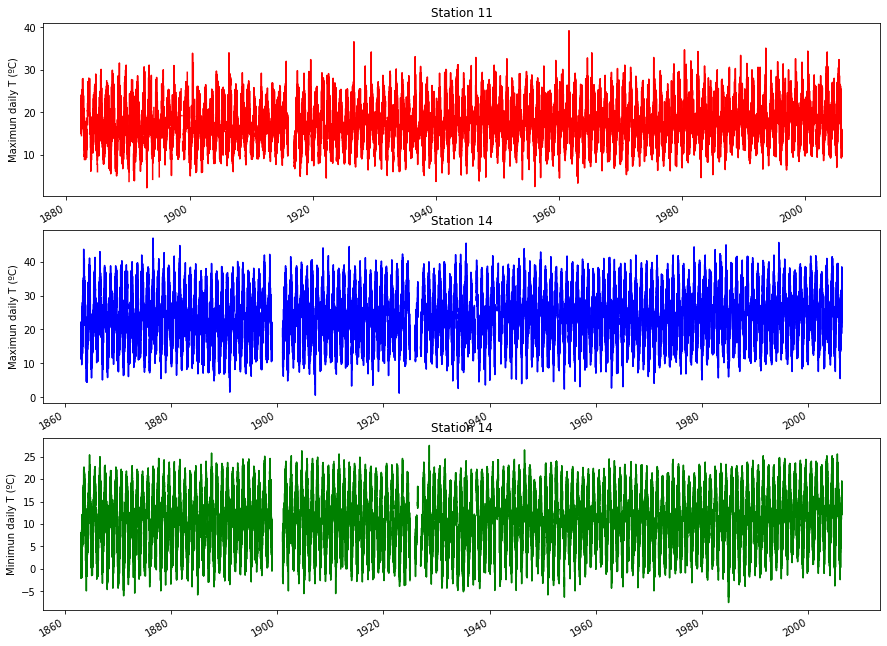

In [13]:
# Use pandas library for plotting daily series
fig, axs = plt.subplots(3, figsize=(15,12))
data11.Tmax.plot(
    ax=axs[0],
    color='red',
    title='Station 11',
    #ylabel='Maximun daily T (ºC)'
)

data14.Tmax.plot(
    ax=axs[1],
    color='blue',
    title='Station 14',
    #ylabel='Maximun daily T (ºC)'
)

data14.Tmin.plot(
    ax=axs[2],
    color='green',
    title='Station 14',
    #ylabel='Minimun daily T (ºC)'
)
plt.show()

## 2.3 Monthly maxima

In [14]:
df_mm_max11 = data11.groupby(by=['year','month'])['Tmax'].max().dropna().reset_index()
df_mm_max11 = pd.merge(df_mm_max11, data11, how='inner', on=['year', 'month', 'Tmax'])
df_mm_max11['date'] = pd.to_datetime(df_mm_max11[['year', 'month', 'day']], errors='coerce')
print(df_mm_max11)

df_mm_max14= data14.groupby(by=['year','month'])['Tmax'].max().dropna().reset_index()
df_mm_max14 = pd.merge(df_mm_max14, data14, how='inner', on=['year', 'month', 'Tmax'])
df_mm_max14['date'] = pd.to_datetime(df_mm_max14[['year', 'month', 'day']], errors='coerce')

      year  month  Tmax  day       date
0     1882      5  24.1   31 1882-05-31
1     1882      6  24.4   29 1882-06-29
2     1882      7  23.5   14 1882-07-14
3     1882      8  27.7    7 1882-08-07
4     1882      9  27.9    8 1882-09-08
...    ...    ...   ...  ...        ...
1585  2005      8  28.6    7 2005-08-07
1586  2005      9  26.5    4 2005-09-04
1587  2005     10  26.2    9 2005-10-09
1588  2005     11  20.0    2 2005-11-02
1589  2005     12  16.0   22 2005-12-22

[1590 rows x 5 columns]


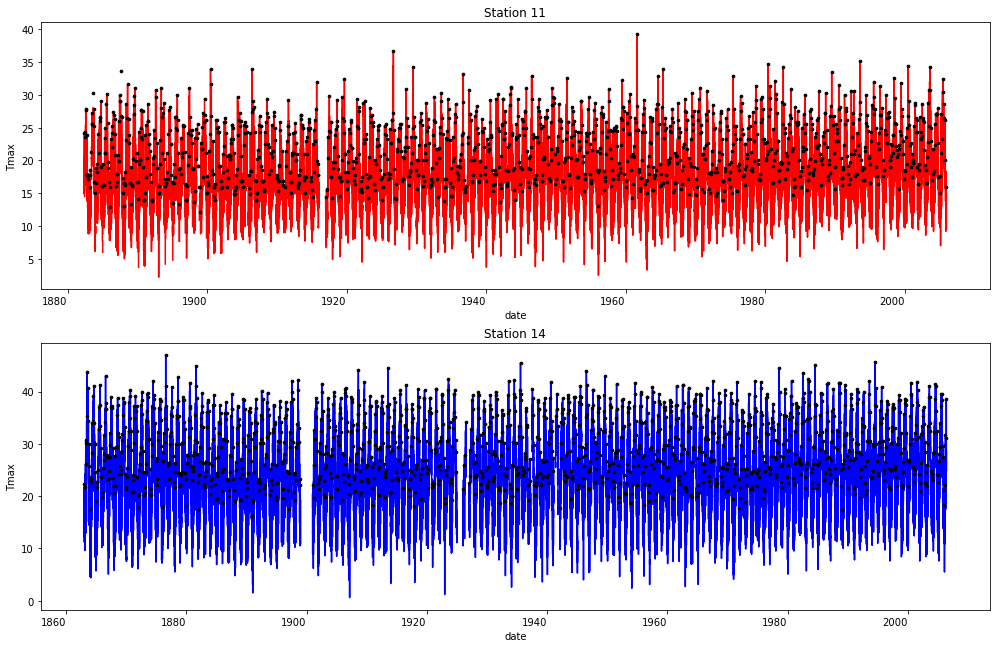

In [15]:
fig, axs = plt.subplots(2, figsize=(17,12))
data11.Tmax.plot(
    ax=axs[0],zorder=1,
    color='red',
    title='Station 11',
    ylabel='Maximun daily T (ºC)')

df_mm_max11.plot.scatter(
    x='date', y='Tmax',
    ax=axs[0], color='k', s=7,
    zorder=2
)

data14.Tmax.plot(
    ax=axs[1],zorder=1,
    color='blue',
    title='Station 14',
    ylabel='Maximun daily T (ºC)')

df_mm_max14.plot.scatter(
    x='date', y='Tmax',
    ax=axs[1], color='k', s=7,
    zorder=2
)

plt.show()

In [11]:
# Plot the maximun montlhy temperatures from 1 Jan - 31 Dec

In [16]:
# Create year colum
df_mm_max11.year = np.ones(len(df_mm_max11))*1990
df_mm_max11.index = pd.to_datetime(df_mm_max11[['year', 'month', 'day']], errors='coerce')
df_mm_max11.index.name = 'time'
ds_mm_max11 = df_mm_max11.to_xarray()

df_mm_max14.year = np.ones(len(df_mm_max14))*1990
df_mm_max14.index = pd.to_datetime(df_mm_max14[['year', 'month', 'day']], errors='coerce')
df_mm_max14.index.name = 'time'
ds_mm_max14 = df_mm_max14.to_xarray()

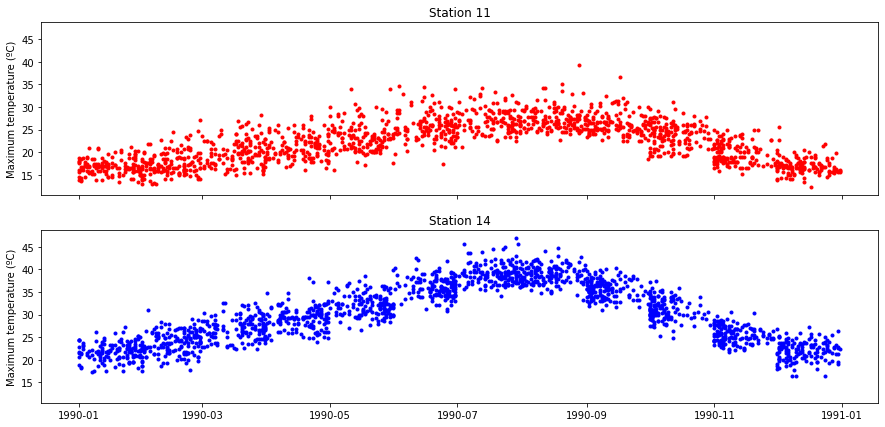

In [17]:
fig, axs = plt.subplots(2, figsize=(15,7), sharex=True, sharey=True)
axs[0].plot(ds_mm_max11.time, ds_mm_max11.Tmax, '.', color='r')
axs[0].set_ylabel('Maximum temperature (ºC)')
axs[0].set_title('Station 11')

axs[1].plot(ds_mm_max14.time, ds_mm_max14.Tmax, '.', color='b')
axs[1].set_ylabel('Maximum temperature (ºC)')
axs[1].set_title('Station 14')
plt.show()

## 2.4 GEV distribution fit to monthly maxima

In [19]:
fit

(0.1878872286493184, 20.263957378476057, 4.285008008298583)

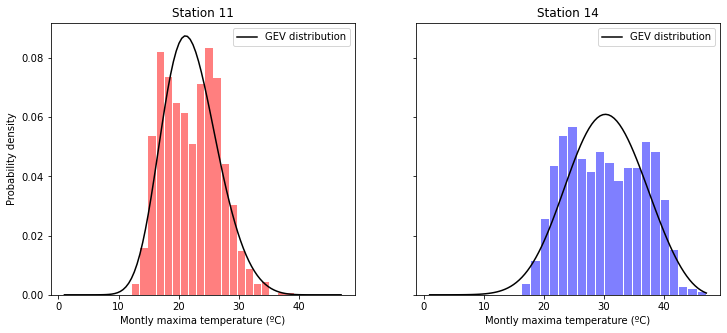

In [18]:
# Fitting GEV distribution and plotting with matplotlib
from scipy.stats import genextreme as gev

nbins = 20
t = np.linspace(1,np.max([df_mm_max11.Tmax.max(),df_mm_max14.Tmax.max()]),100)

fit = gev.fit(df_mm_max11.Tmax)
pdf = gev.pdf(t, *fit)

fit1 = gev.fit(df_mm_max14.Tmax)
pdf1 = gev.pdf(t, *fit1)

fig, axs = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)
axs[0].plot(t,pdf, color='k', label='GEV distribution')
axs[0].hist(df_mm_max11.Tmax,
         bins=nbins,color='red',
         alpha=0.5, density=1, 
         rwidth=0.9)

axs[1].plot(t,pdf1, color='k', label='GEV distribution')
axs[1].hist(df_mm_max14.Tmax,
         bins=nbins,color='blue',
         alpha=0.5, density=1, 
         rwidth=0.9)

axs[0].set_xlabel('Montly maxima temperature (ºC)')
axs[1].set_xlabel('Montly maxima temperature (ºC)')
axs[0].set_ylabel('Probability density')
axs[0].set_title('Station 11')
axs[1].set_title('Station 14')
axs[0].legend()
axs[1].legend()
plt.show()

## 2.5 Probability density functions of montlhy maximas

In [20]:
station = df_mm_max11

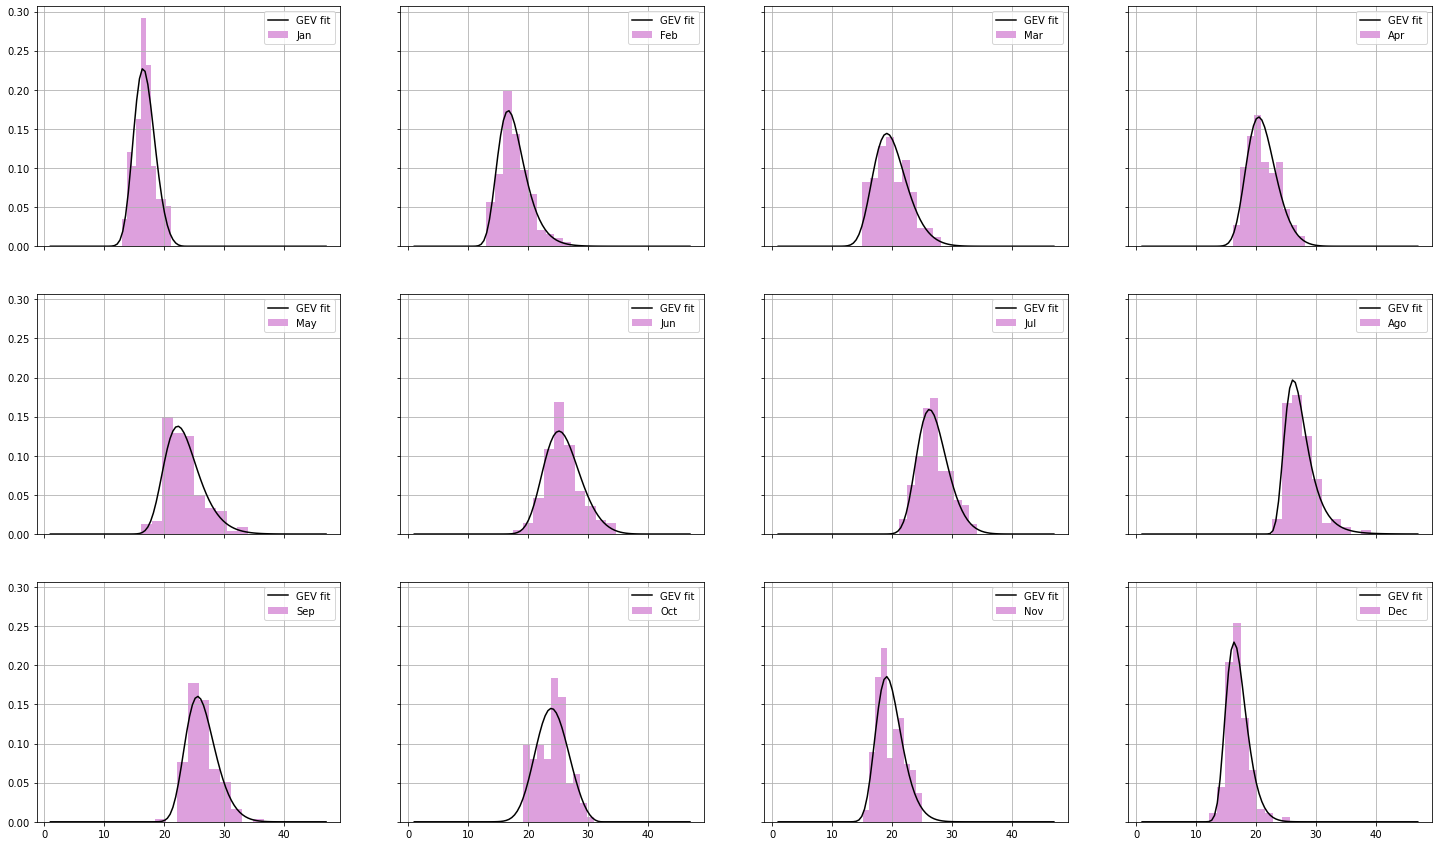

In [21]:
# scatterplot every variable (using matplotlib.gridspec)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(3, 4, figsize=(25,15), sharex=True, sharey=True)

m = 0
for c1, v1 in enumerate(np.arange(0,3,1)):
    for c2, v2 in enumerate(np.arange(0,4,1)):
        m+=1
        datai = station.loc[station.month==m].Tmax
            
        fit = gev.fit(datai)
        pdf = gev.pdf(t, *fit)
        
        axs[c1,c2].plot(t, pdf, label='GEV fit', color='k')
        datai.hist(ax=axs[c1, c2], density=1, label=month[m-1], color='plum')
        axs[c1, c2].legend()
plt.show()

## 2.5 Anual maxima

In [22]:
df_am_max11 = data11.groupby(by=['year'])['Tmax'].max().dropna().reset_index()
df_am_max11 = pd.merge(df_am_max11, data11, how='inner', on=['year', 'Tmax'])
df_am_max11['date'] = pd.to_datetime(df_am_max11[['year', 'month', 'day']], errors='coerce')
print(df_am_max11)

df_am_max14= data14.groupby(by=['year'])['Tmax'].max().dropna().reset_index()
df_am_max14 = pd.merge(df_am_max14, data14, how='inner', on=['year', 'Tmax'])
df_am_max14['date'] = pd.to_datetime(df_am_max14[['year', 'month', 'day']], errors='coerce')

     year  Tmax  month  day       date
0    1882  27.9      9    8 1882-09-08
1    1883  30.3      8   26 1883-08-26
2    1884  29.0     10    5 1884-10-05
3    1885  30.1      8   18 1885-08-18
4    1886  27.4      7   17 1886-07-17
..    ...   ...    ...  ...        ...
126  2001  28.8      7    1 2001-07-01
127  2002  28.6      7   18 2002-07-18
128  2003  34.2      8   12 2003-08-12
129  2004  28.0      9   28 2004-09-28
130  2005  32.4      7   12 2005-07-12

[131 rows x 5 columns]


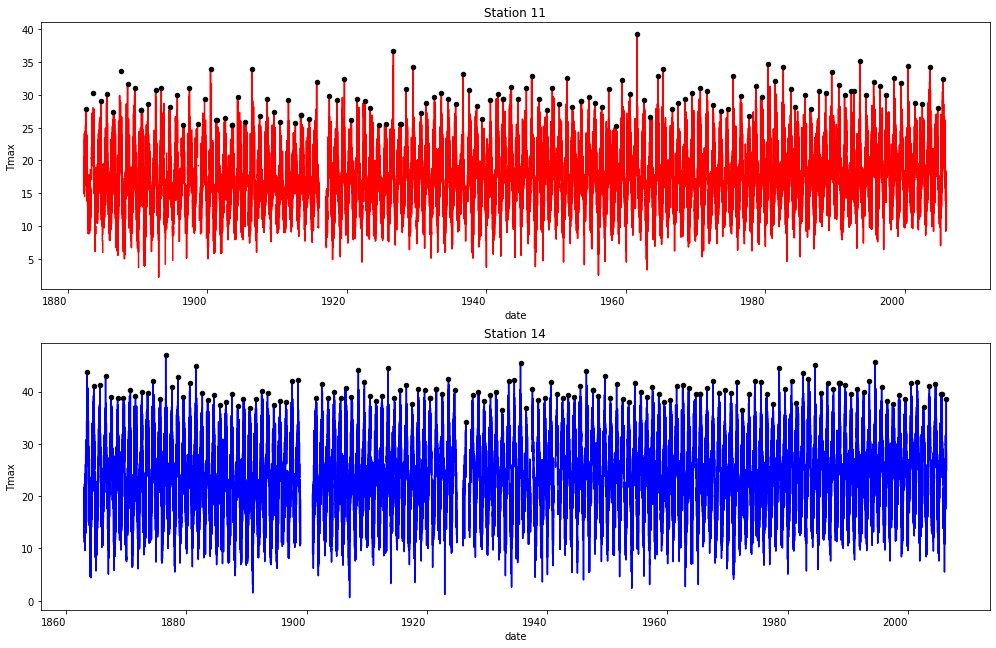

In [23]:
fig, axs = plt.subplots(2, figsize=(17,12))
data11.Tmax.plot(
    ax=axs[0],zorder=1,
    color='red',
    title='Station 11',
    ylabel='Maximun daily T (ºC)')

df_am_max11.plot.scatter(
    x='date', y='Tmax',
    ax=axs[0], color='k',
    zorder=2
)

data14.Tmax.plot(
    ax=axs[1],zorder=1,
    color='blue',
    title='Station 14',
    ylabel='Maximun daily T (ºC)')

df_am_max14.plot.scatter(
    x='date', y='Tmax',
    ax=axs[1], color='k',
    zorder=2
)

plt.show()

In [20]:
# Plot the maximun annual temperatures from 1 Jan - 31 Dec

In [24]:
# Create year colum
df_am_max11.year = np.ones(len(df_am_max11))*1990
df_am_max11.index = pd.to_datetime(df_am_max11[['year', 'month', 'day']], errors='coerce')
df_am_max11.index.name = 'time'
df_am_max11 = df_am_max11.to_xarray()

df_am_max14.year = np.ones(len(df_am_max14))*1990
df_am_max14.index = pd.to_datetime(df_am_max14[['year', 'month', 'day']], errors='coerce')
df_am_max14.index.name = 'time'
df_am_max14 = df_am_max14.to_xarray()

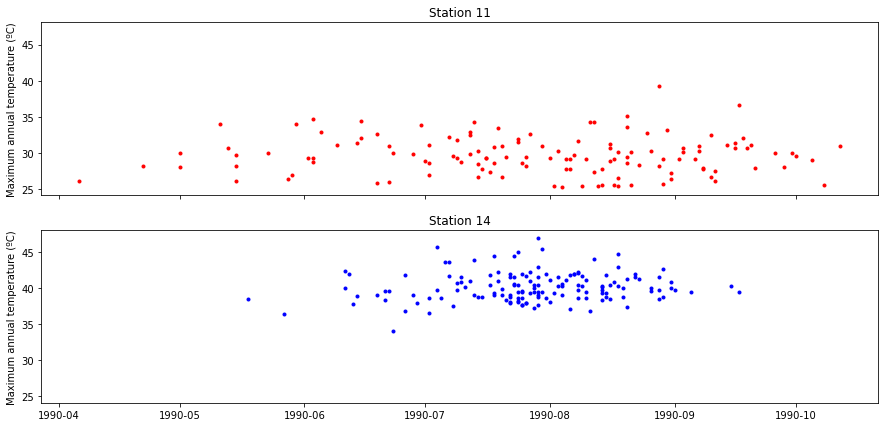

In [25]:
fig, axs = plt.subplots(2, figsize=(15,7), sharex=True, sharey=True)
axs[0].plot(df_am_max11.time, df_am_max11.Tmax, '.', color='r')
axs[0].set_ylabel('Maximum annual temperature (ºC)')
axs[0].set_title('Station 11')

axs[1].plot(df_am_max14.time, df_am_max14.Tmax, '.', color='b')
axs[1].set_ylabel('Maximum annual temperature (ºC)')
axs[1].set_title('Station 14')
plt.show()

## 2.6 GEV distribution fit to annual maxima

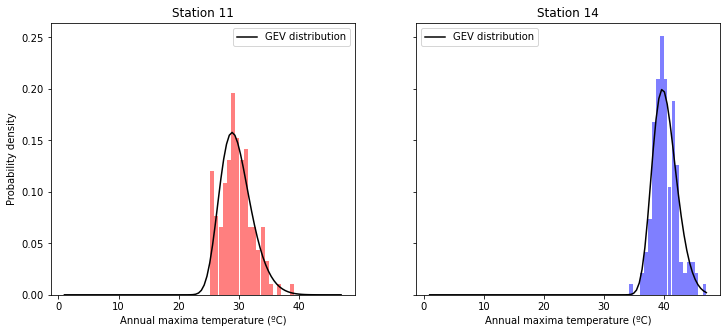

In [26]:
# Fitting GEV distribution and plotting with matplotlib
nbins = 20
t = np.linspace(1,np.max([df_am_max11.Tmax.max(),df_am_max14.Tmax.max()]),100)

fit = gev.fit(df_am_max11.Tmax)
pdf = gev.pdf(t, *fit)

fit1 = gev.fit(df_am_max14.Tmax)
pdf1 = gev.pdf(t, *fit1)

fig, axs = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)
axs[0].plot(t,pdf, color='k', label='GEV distribution')
axs[0].hist(df_am_max11.Tmax,
         bins=nbins,color='red',
         alpha=0.5, density=1, 
         rwidth=0.95)

axs[1].plot(t,pdf1, color='k', label='GEV distribution')
axs[1].hist(df_am_max14.Tmax,
         bins=nbins,color='blue',
         alpha=0.5, density=1, 
         rwidth=0.95)

axs[0].set_xlabel('Annual maxima temperature (ºC)')
axs[1].set_xlabel('Annual maxima temperature (ºC)')
axs[0].set_ylabel('Probability density')
axs[0].set_title('Station 11')
axs[1].set_title('Station 14')
axs[0].legend()
axs[1].legend()
plt.show()